# Introducción

## Trip Advisor Hotel Reviews

### About this dataset
- Los hoteles juegan un papel crucial en los viajes, y con el mayor acceso a la información, han surgido nuevas formas de seleccionar los mejores.
- Con este conjunto de datos, que consta de 20,000 reseñas extraídas de TripAdvisor, podrás explorar qué hace que un hotel sea excelente e incluso podrías utilizar este modelo en tus propios viajes.


# Objetivos

- Análisis de los datos
- Limpieza de los textos



In [1]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [7]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import re

In [8]:
#Importing the dataset
df =pd.read_csv("tripadvisor_hotel_reviews.csv")


# look the data set
df.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [9]:
# looking the shape DataSet
df.shape

(20491, 2)

- Tenemos aproximadamente 20K Reviews

In [10]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [11]:
#checking null value 
df.isna().sum()

Review    0
Rating    0
dtype: int64

- No hay valores faltantes

In [12]:
df["Rating"].describe().round(2)

count    20491.00
mean         3.95
std          1.23
min          1.00
25%          3.00
50%          4.00
75%          5.00
max          5.00
Name: Rating, dtype: float64

- La puntuación media es aproximadamente 4

In [13]:
# revisa si hay datos duplicados 
df.duplicated().sum()

np.int64(0)

- No hay datos duplicados

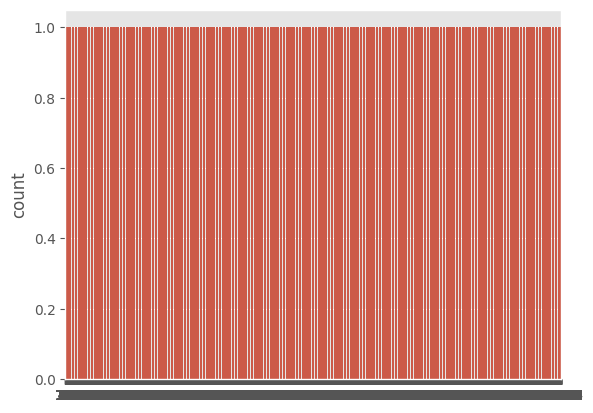

In [31]:
# ¿Qué distribución porcentual tienen las puntuaciones en el dataset?

sns.countplot(df['Rating'])
plt.show()

In [32]:
#porcentaje de ejemplos para cada valoracion en Rating en el dataset
print(df['Rating'].value_counts(normalize=True))


Rating
5    0.441853
4    0.294715
3    0.106583
2    0.087502
1    0.069348
Name: proportion, dtype: float64


### TPuntuaciones porcentuales
- 5 = 44%
- 4 = 30%
- 3 = 10%
- 2 = 9%
- 1 = 7% 

In [15]:
# longitud
df['Length'] = df['Review'].apply(len)
df.head()

Review  Rating  Length
0  nice hotel expensive parking got good deal sta...       4     593
1  ok nothing special charge diamond member hilto...       2    1689
2  nice rooms not 4* experience hotel monaco seat...       3    1427
3  unique, great stay, wonderful time hotel monac...       5     600
4  great stay great stay, went seahawk game aweso...       5    1281

In [16]:
# look  describe data set
df["Length"].describe().round(2)

count    20491.0
mean       724.9
std        689.1
min         44.0
25%        339.0
50%        537.0
75%        859.0
max      13501.0
Name: Length, dtype: float64

<Axes: xlabel='Rating', ylabel='Length'>

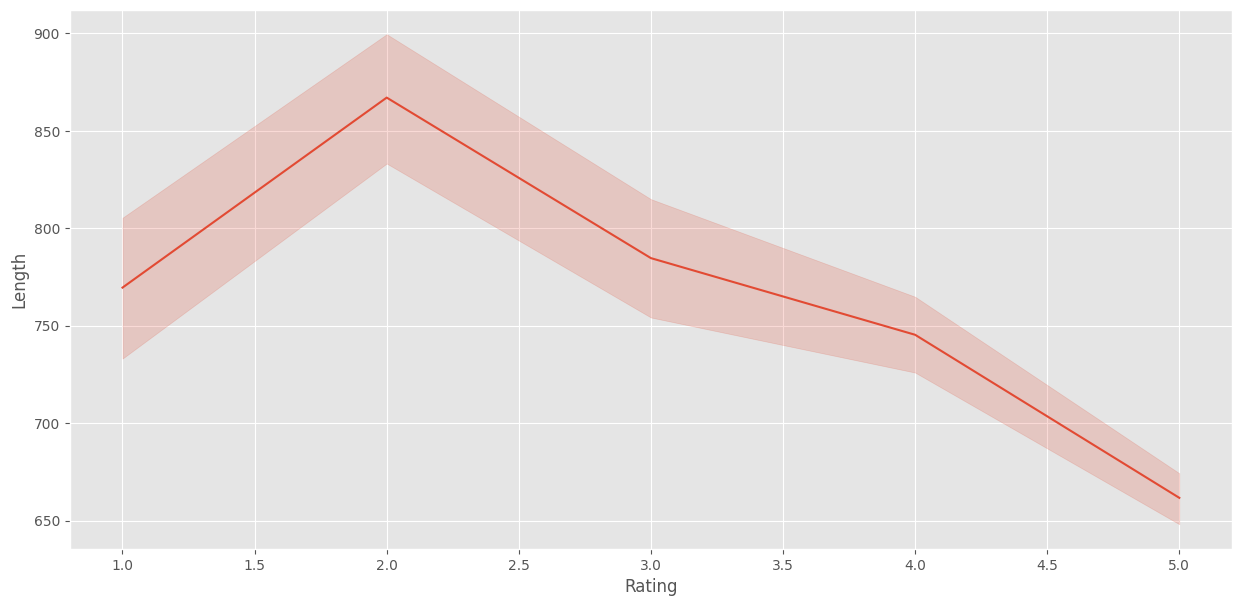

In [17]:
# Análisis y Visualización: Relación entre Rating y Longitud de Reseñas

plt.figure(figsize=(15,7))
sns.lineplot(data=df,x="Rating", y="Length")

In [18]:
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [19]:
px.scatter(df,x="Rating",y="Length", color="Rating")

Observo que la longitud de las reseñas tiene un efecto en la puntuación (rating).

In [20]:
df_5=df[df["Rating"]==5]
df_5

Review  Rating  Length
3      unique, great stay, wonderful time hotel monac...       5     600
4      great stay great stay, went seahawk game aweso...       5    1281
5      love monaco staff husband stayed hotel crazy w...       5    1002
6      cozy stay rainy city, husband spent 7 nights m...       5     748
8      hotel stayed hotel monaco cruise, rooms genero...       5     419
...                                                  ...     ...     ...
20473  best best reason affordable better hotels city...       5     152
20476  night not trust not disappointed stay hotel, s...       5    1082
20480  great play stay stay loyal inn package deal ha...       5     256
20482  great choice wife chose best western quite bit...       5     716
20486  best kept secret 3rd time staying charm, not 5...       5     733

[9054 rows x 3 columns]

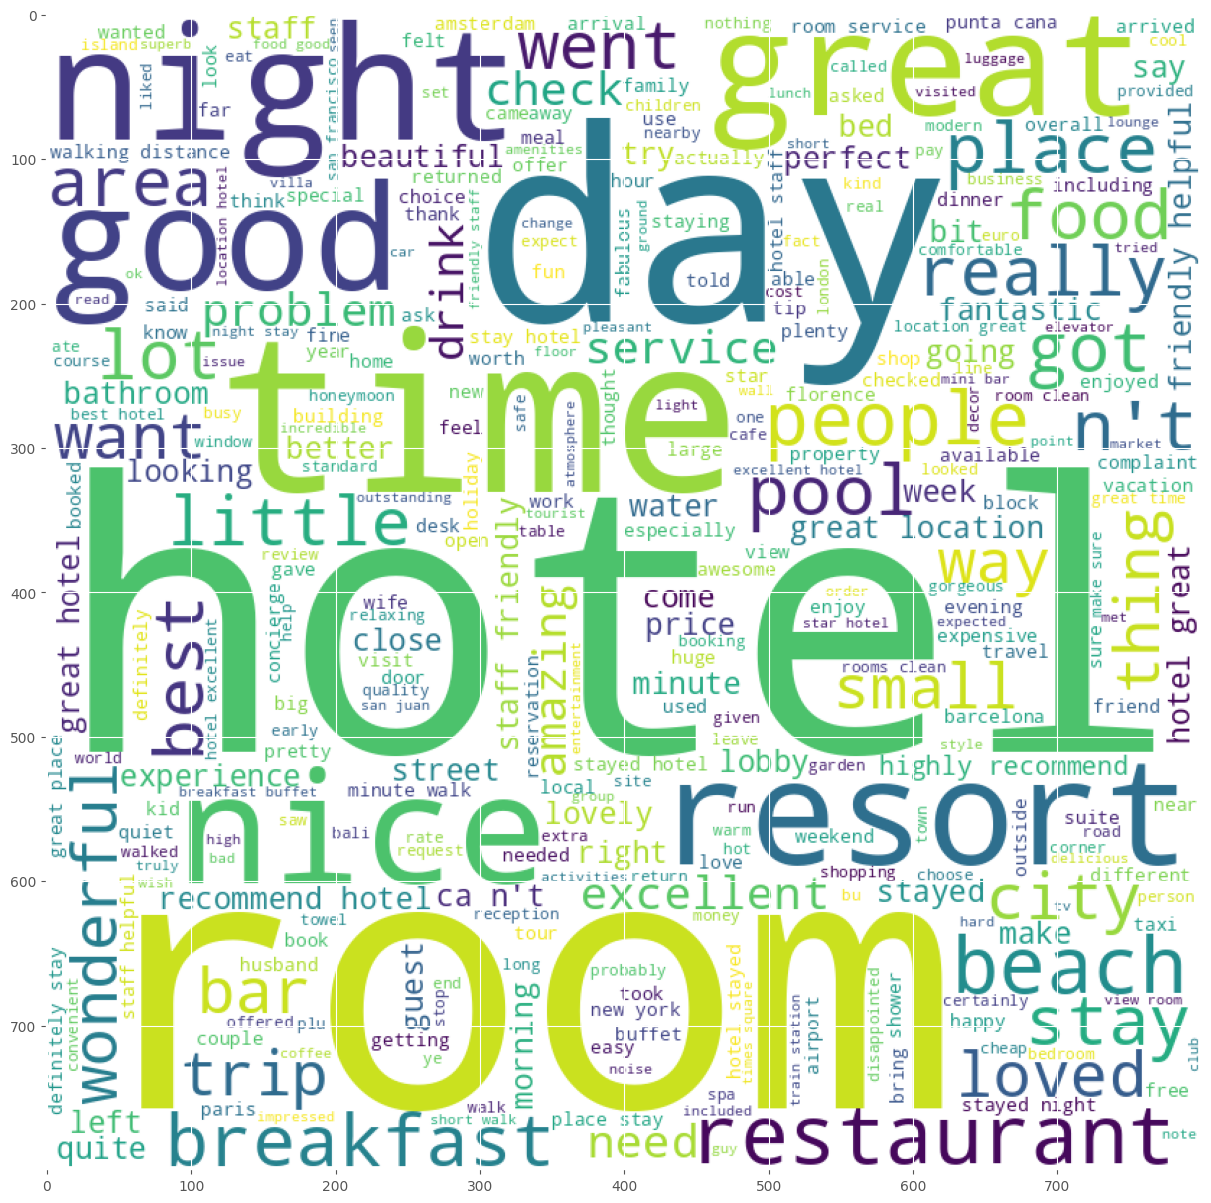

In [21]:
# La palabra que más se repite en las reseñas con valoración 5 es..

plt.figure(figsize=(15,15))
wc1 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_5['Review']))

plt.imshow(wc1)

### Observo que las personas satisfechas (valoración 5) mencionan frecuentemente estas palabras:
- **En general:** el hotel  
- La habitación  
- La noche  
- El Tiempo 
- El restaurante, comida y bebidas  
- La cama  
- La piscina  
- Las ubicaciones 


In [23]:
df_4=df[df["Rating"]==4]
df_4

Review  Rating  Length
0      nice hotel expensive parking got good deal sta...       4     593
7      excellent staff, housekeeping quality hotel ch...       4     597
11     nice value seattle stayed 4 nights late 2007. ...       4     364
12     nice hotel good location hotel kimpton design ...       4     569
14     great hotel night quick business trip, loved l...       4     202
...                                                  ...     ...     ...
20475  good stay spent night pacific northwest/northe...       4     441
20477  nice hotel pioneer square area stayed late aug...       4     454
20478  just fine, hotel located pioneer square just q...       4     727
20483  good bed clean convenient just night happy sta...       4     420
20487  great location price view hotel great quick pl...       4     306

[6039 rows x 3 columns]

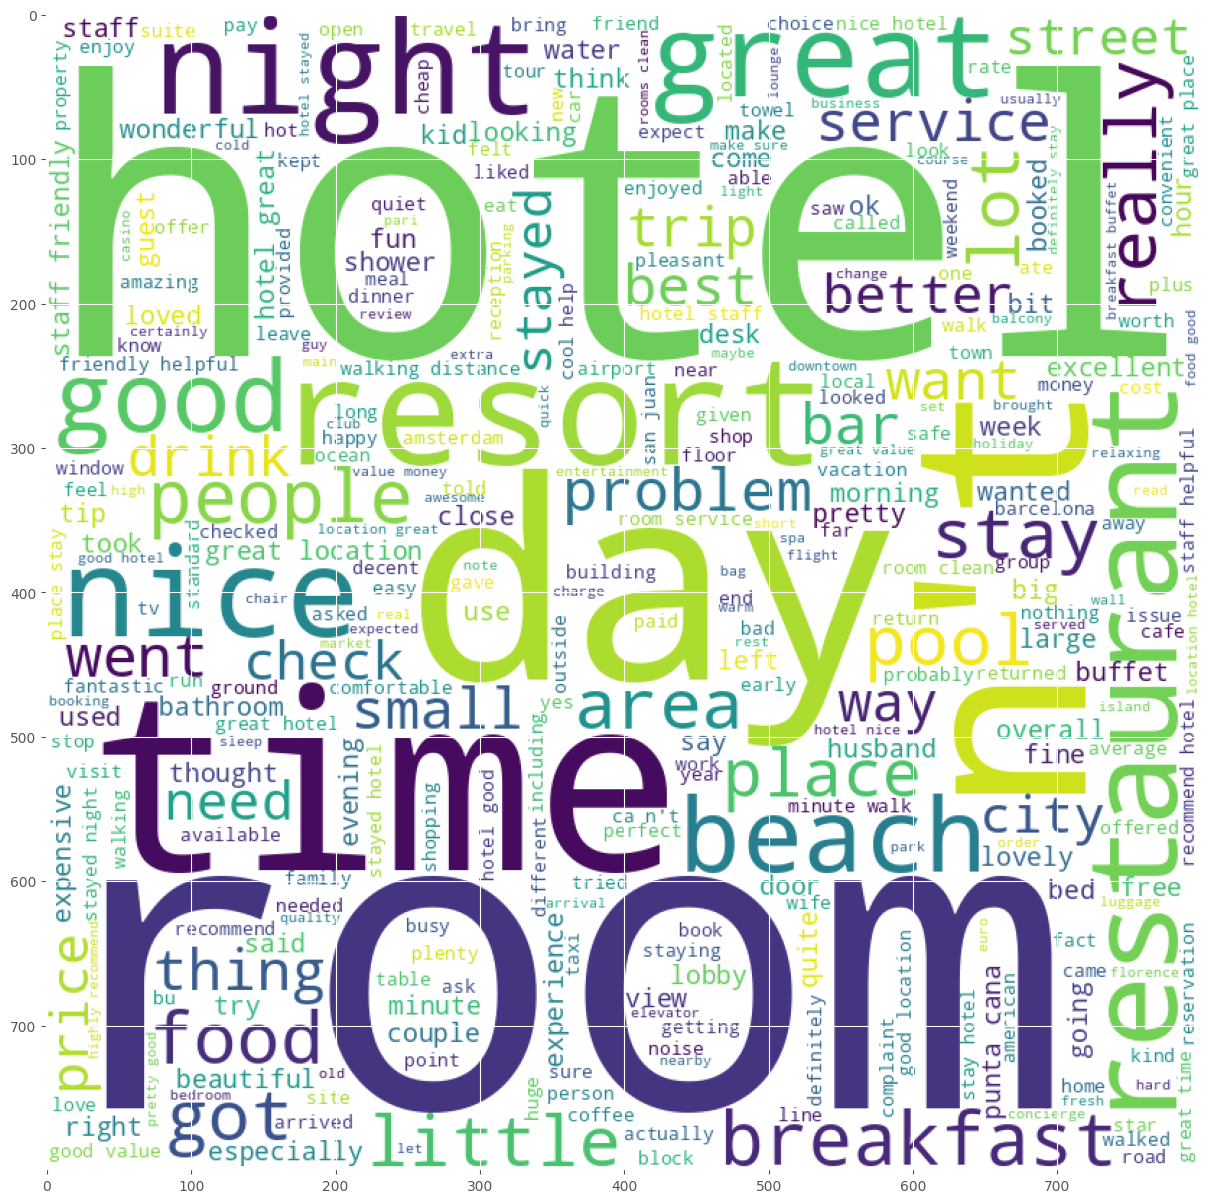

In [24]:
# tLa palabra que más se repite en las reseñas con valoración 4 es..

plt.figure(figsize=(15,15))
wc2 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_4['Review']))

plt.imshow(wc2)

In [25]:
df_3=df[df["Rating"]==3]
df_3

Review  Rating  Length
2      nice rooms not 4* experience hotel monaco seat...       3    1427
13     nice hotel not nice staff hotel lovely staff q...       3     417
19     hmmmmm say really high hopes hotel monaco chos...       3    1025
25     n't mind noise place great, read reviews noise...       3     482
27     met expectations centrally located hotel block...       3     538
...                                                  ...     ...     ...
20406  good good great location new clean modern bath...       3     376
20408  ok ok. room clean tidy, staff friendly, good h...       3     165
20419  nice try stayed hotel day grand opening, booke...       3     699
20446  ok short stay booked hotel night stopover, sin...       3     566
20458  perfect ca n't beat location, beach incredible...       3     180

[2184 rows x 3 columns]

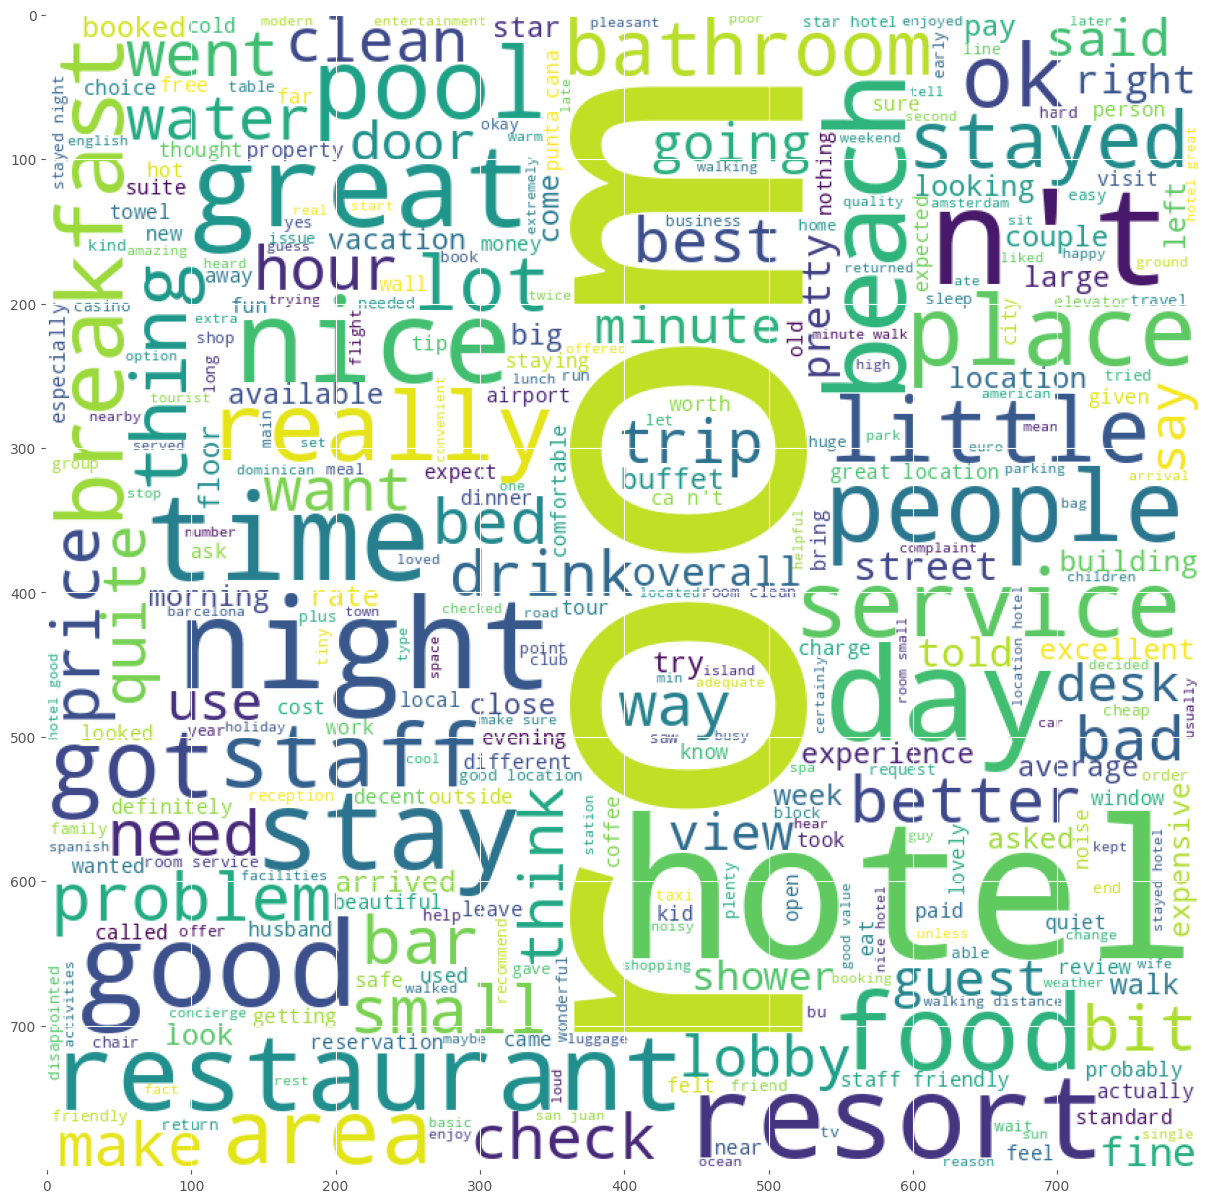

In [ ]:
plt.figure(figsize=(15,15))
wc3 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_3['Review']))

plt.imshow(wc3)

In [27]:
df_2=df[df["Rating"]==2]
df_2

Review  Rating  Length
1      ok nothing special charge diamond member hilto...       2    1689
10     poor value stayed monaco seattle july, nice ho...       2     333
16     disappointed say anticipating stay hotel monac...       2    1662
24     great location need internally upgrade advanta...       2     250
33     good location poor cleanliness warwick hotel g...       2     576
...                                                  ...     ...     ...
20481  ok price look hotel ok little run average clea...       2     247
20484  deceptive staff deceptive desk staff claiming ...       2     695
20485  not impressed unfriendly staff checked asked h...       2     616
20488  ok just looks nice modern outside, desk staff ...       2     443
20490  people talking, ca n't believe excellent ratin...       2     620

[1793 rows x 3 columns]

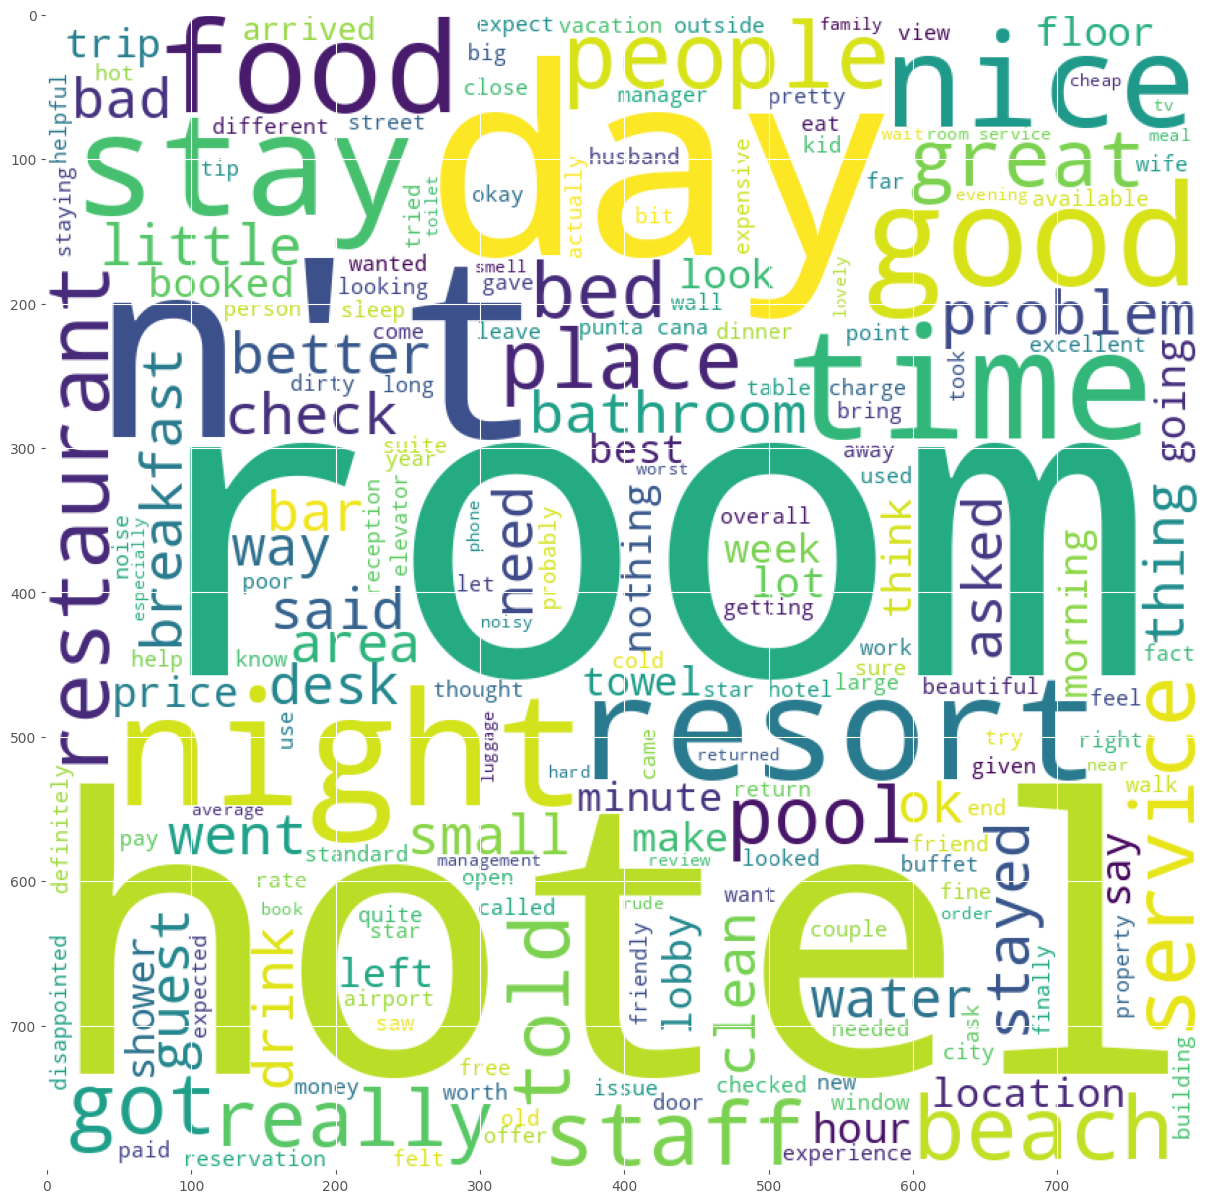

In [28]:
plt.figure(figsize=(15,15))
wc4 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_2['Review']))

plt.imshow(wc4)

#### Observo que las personas insatisfechas (valoración 2) mencionan estas palabras (similares a los ratings 5 y 4, pero añadiendo...):
- Hotel
- Personal (staff)
- Playa (beach)
- Servicio (service)
- Estancia (stay)
- Ducha (shower)

In [29]:
df_1=df[df["Rating"]==1]
df_1

Review  Rating  Length
15     horrible customer service hotel stay february ...       1    1411
32     noise airconditioner-a standard, arranged stay...       1     614
40     bad choice, booked hotel hot wire called immed...       1     861
65     hated inn terrible, room-service horrible staf...       1     133
69     ace grunge lives does mold mildew tiny bed met...       1      84
...                                                  ...     ...     ...
20421  worst sleep hip tooooo hip nite club building ...       1     342
20460  june 08 stay stayed hotel june 6/6-6/8/08, rea...       1     682
20465  not stay hotel brought group february worst ho...       1     305
20467  returning la concha nightmare surprising hotel...       1     460
20489  hotel theft ruined vacation hotel opened sept ...       1    5557

[1421 rows x 3 columns]

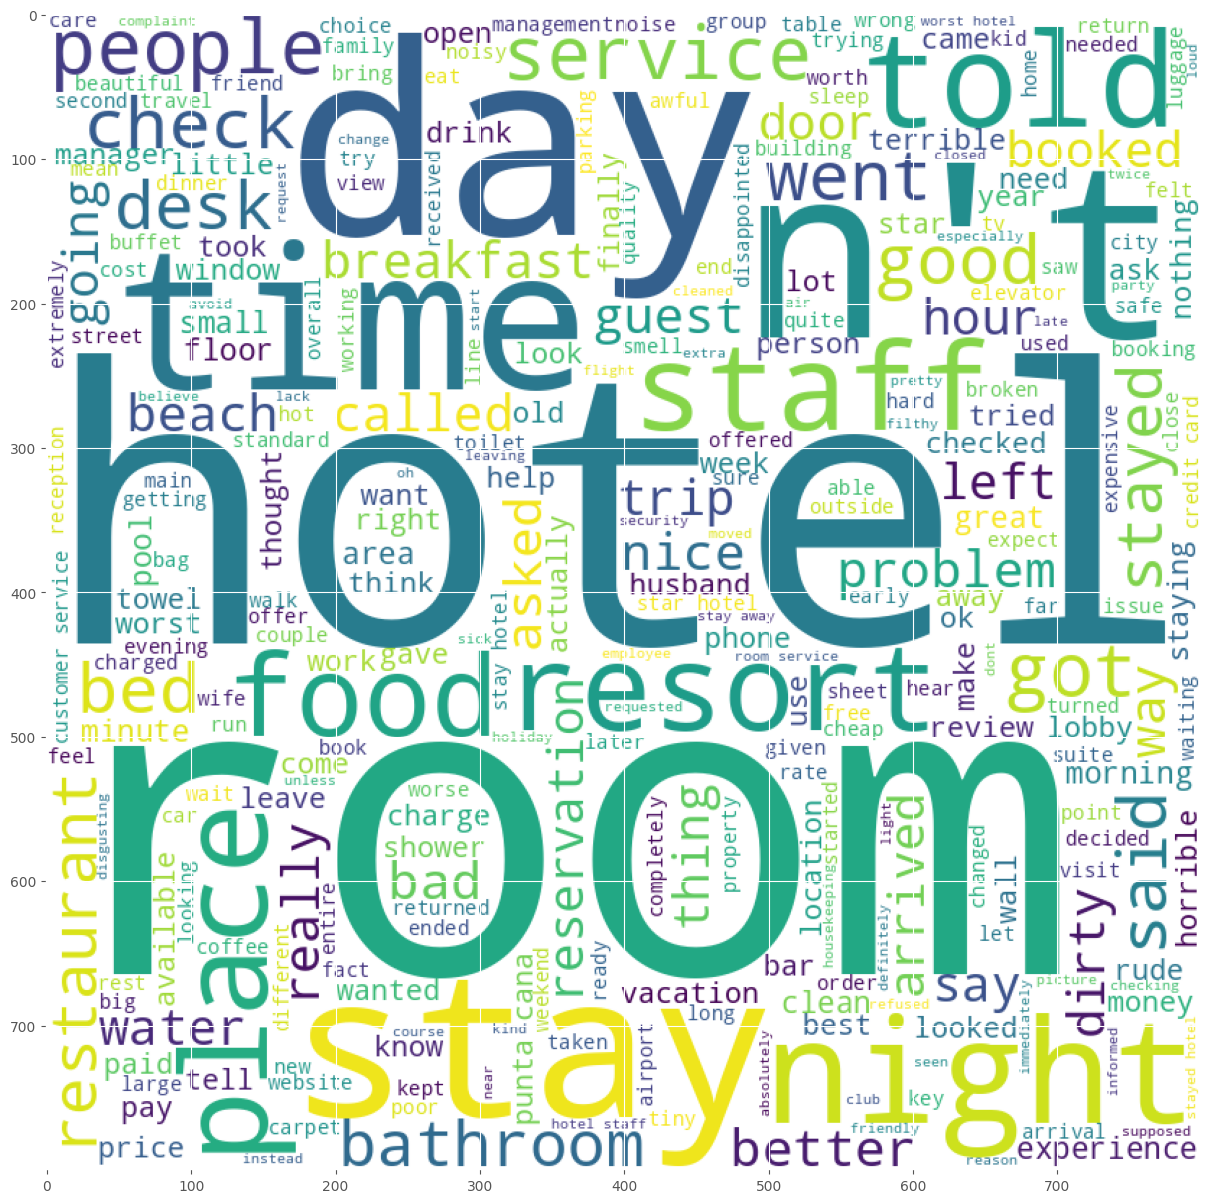

In [ ]:
plt.figure(figsize=(15,15))
wc5 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_1['Review']))

plt.imshow(wc5)

# Resultados del Análisis 😃😃😃

#### Tenemos 20,000 reseñas de hoteles con valoraciones del 1 al 5

##### Distribución porcentual de valoraciones:
- ★★★★★ (5) = 44%
- ★★★★ (4) = 30%
- ★★★ (3) = 10%
- ★★ (2) = 9%
- ★ (1) = 7%

### Observo que la longitud de las reseñas afecta a la valoración.

## Rating 5 = 44% → Satisfechos
#### Palabras clave en reseñas de 5 estrellas:
- General: hotel - habitación - noche - playa
- Restaurante/comida/bebidas - cama - piscina - ubicaciones

## Rating 4 = 30% → Satisfechos
#### Palabras clave (similares a 5★ pero añaden):
- Hotel bonito - personal amable - servicio - calle/ubicación

## Rating 2 = 9% → Insatisfechos
#### Palabras clave (compartidas con 5★/4★ pero en negativo):
- Hotel - personal - playa - servicio
- [¿Disco/disk? Error posible: "desk" (recepcion)] 
- Estancia - ducha

## Rating 1 = 7% → Insatisfechos
#### Palabras clave adicionales:
- Habitación - hotel - lugar - personal
- Puerta - check-in - sueño - baño
- Resort - agua

## Conclusión: 
📊 **Aproximadamente el 75% de los visitantes están satisfechos** (suma de ratings 4-5 estrellas) lo que es un buen indicador de la calidad de los hoteles, pero en la base de datos tenemos claramente un desbalance en la distribución de las valoraciones.

# 2- Limpieza

In [33]:
df.head()

Review  Rating  Length
0  nice hotel expensive parking got good deal sta...       4     593
1  ok nothing special charge diamond member hilto...       2    1689
2  nice rooms not 4* experience hotel monaco seat...       3    1427
3  unique, great stay, wonderful time hotel monac...       5     600
4  great stay great stay, went seahawk game aweso...       5    1281

In [ ]:
# Primera reseña
a=df.iloc[0,0]
a

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

### Paso 1: Limpieza manual inicial
- Procesaré manualmente la primera revisión como prueba

### Paso 2: Automatización
- Crearé una función de limpieza o bucle for para aplicar las mismas reglas a todo el dataset

In [35]:
%pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.2.0-py3-none-any.whl.metadata (2.5 kB)
  Using cached joblib-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached regex-2024.11.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (792 kB)
Using cached click-8.2.0-py3-none-any.whl (102 kB)
Using cached joblib-1.5.0-py3-none-any.whl (307 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [nltk]━━━━━━ 4/5 [nltk]b]
Note: you may need to restart the kernel to use updated packages.


In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [37]:
a=re.sub('[^a-zA-Z0-9]',' ',a)
a=a.lower().split()
a

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'reviews',
 'did',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'non',
 'existent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillows',
 'not',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bangs',
 'doors',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'just',
 'noisy',
 'neighbors',
 'aveda',
 'bath',
 'products',
 'nice',
 'did',
 'not',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'having',
 'pay',
 '40',
 'parking',
 'night']

In [38]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/elias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:

sw=set(stopwords.words('english'))
print(sw)

{'other', 'mustn', 'shouldn', 'these', 'i', "isn't", "couldn't", 've', "needn't", "you've", 'her', 'that', 'won', 'after', 'ourselves', 'from', 'have', 'only', 't', "wasn't", 'he', 'to', 'at', 'about', 'aren', 'don', 're', 'what', 'having', "won't", 'against', "they've", "i'm", 'same', 'which', 'why', 'below', 'all', 'or', "we're", "you'll", 'each', 'them', 'nor', 'but', 'during', 'o', 'is', 'me', 'yours', 'shan', 'not', 'where', 'just', 'when', 'ma', 'too', 'theirs', 'once', 'down', 'few', "mustn't", 'as', 'how', 'myself', 'those', 'until', 'am', "we'd", 'isn', 'are', 'any', 'can', "shouldn't", 'm', 'of', 'were', 'in', "it'll", 'my', 'above', "haven't", 'under', 'our', 'its', "should've", 'more', 'with', 'y', "weren't", 'has', 'couldn', 'very', "they're", 'they', 'because', 's', "we've", 'a', "shan't", 'will', "doesn't", "don't", 'into', 'an', "he'd", 'before', 'over', 'there', 'she', 'your', "you're", 'such', 'was', 'by', 'ours', 'hasn', 'did', 'who', 'his', "she'd", 'the', 'been', '

In [40]:
clean_word=[i for i in a if not i in sw]
clean_word

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'reviews',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'non',
 'existent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillows',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bangs',
 'doors',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'noisy',
 'neighbors',
 'aveda',
 'bath',
 'products',
 'nice',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'pay',
 '40',
 'parking',
 'night']

In [41]:
sen=' '.join(clean_word)
sen

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night'

In [42]:
def text_preprocessing(a):
  a=re.sub('[^a-zA-Z]',' ',a)
  a=a.lower().split()
  ps=PorterStemmer()
  clean_word=[ps.stem(i) for i in a if not i in sw]
  sen=' '.join(clean_word)
  return sen

In [43]:
df['clean_word']=df["Review"].apply(text_preprocessing)
df.head()


Review  Rating  Length  \
0  nice hotel expensive parking got good deal sta...       4     593   
1  ok nothing special charge diamond member hilto...       2    1689   
2  nice rooms not 4* experience hotel monaco seat...       3    1427   
3  unique, great stay, wonderful time hotel monac...       5     600   
4  great stay great stay, went seahawk game aweso...       5    1281   

                                          clean_word  
0  nice hotel expens park got good deal stay hote...  
1  ok noth special charg diamond member hilton de...  
2  nice room experi hotel monaco seattl good hote...  
3  uniqu great stay wonder time hotel monaco loca...  
4  great stay great stay went seahawk game awesom...

In [44]:
df['Length 2'] = df['clean_word'].apply(len)
df.head()

Review  Rating  Length  \
0  nice hotel expensive parking got good deal sta...       4     593   
1  ok nothing special charge diamond member hilto...       2    1689   
2  nice rooms not 4* experience hotel monaco seat...       3    1427   
3  unique, great stay, wonderful time hotel monac...       5     600   
4  great stay great stay, went seahawk game aweso...       5    1281   

                                          clean_word  Length 2  
0  nice hotel expens park got good deal stay hote...       481  
1  ok noth special charg diamond member hilton de...      1407  
2  nice room experi hotel monaco seattl good hote...      1174  
3  uniqu great stay wonder time hotel monaco loca...       506  
4  great stay great stay went seahawk game awesom...      1058

In [45]:
df.describe().round(2)

Rating   Length  Length 2
count  20491.00  20491.0  20491.00
mean       3.95    724.9    597.84
std        1.23    689.1    564.26
min        1.00     44.0     31.00
25%        3.00    339.0    282.00
50%        4.00    537.0    444.00
75%        5.00    859.0    709.00
max        5.00  13501.0  11189.00